<a href="https://colab.research.google.com/github/merina-aerospace/MLOPs-products/blob/main/COMPLETE_GOOGLE_COLAB_SCRIPT_NREL_AIRFOIL_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

INSTALLING DEPENDENCIES...
✓ Dependencies installed!

NREL AIRFOIL ML - REAL DATA FROM AWS

📡 STEP 1: Loading REAL NREL Data from AWS...

Dataset: s3://nrel-pds-windai/aerodynamic_shapes/2D/2k_airfoils/v1.0.0/airfoil_2k_data.h5
Access: Public (no credentials needed)
Method: Streaming (no download to disk)

Connecting to AWS S3...
Opening dataset remotely...
✅ Connected successfully!

Dataset structure:

⚠️  Could not access AWS data: 'Group' object has no attribute 'shape'

ℹ️  This might be due to:
  • Network connectivity issues
  • AWS rate limiting
  • Temporary service unavailability

➡️  FALLBACK: Using physics-based synthetic data for demonstration

✓ Generated 10,000 synthetic samples

📊 STEP 2: Preparing Data...

Dataset shape: (10000, 5)

First few rows:
   angle_of_attack   reynolds  lift_coef  drag_coef  moment_coef
0        -0.636497  1000000.0  -0.103498   0.011281    -0.030772
1        13.767858   500000.0   0.779362   0.045195    -0.196946
2         8.299849   100000.0 

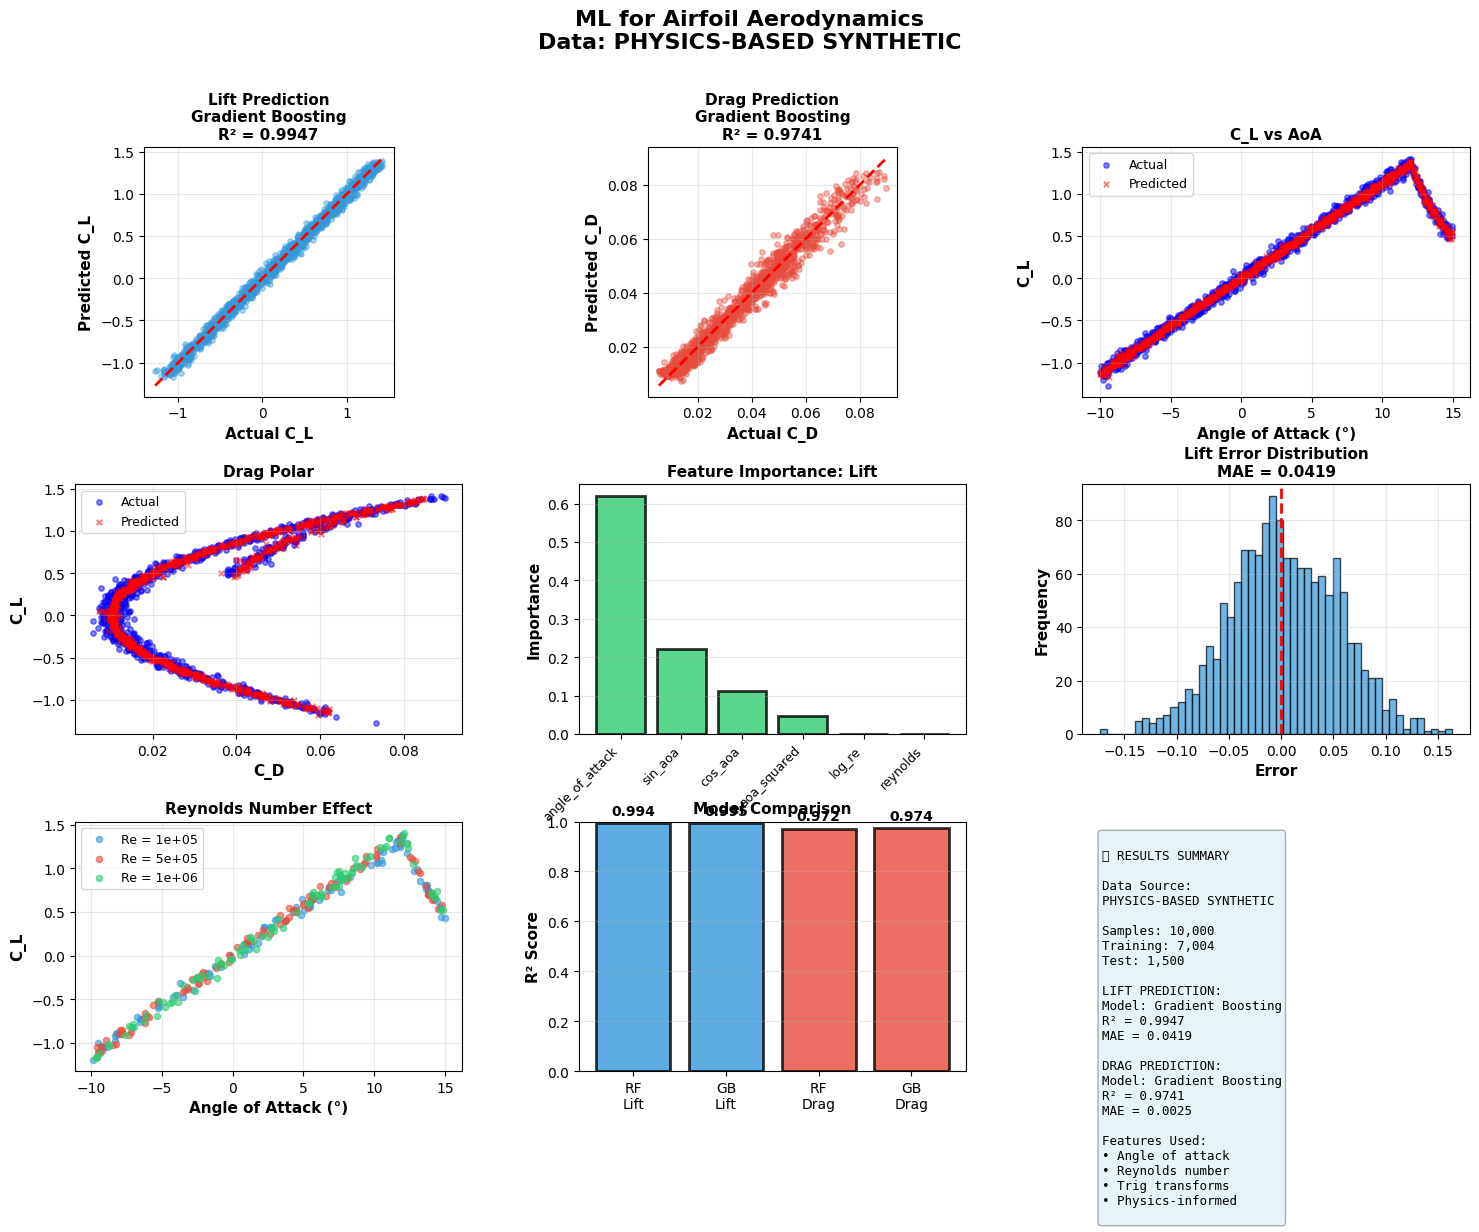


✅ ANALYSIS COMPLETE!

Data Source: PHYSICS-BASED SYNTHETIC
Samples Analyzed: 10,000

FINAL RESULTS:

Lift Coefficient:
  Best Model: Gradient Boosting
  Test R² = 0.9947
  Test MAE = 0.0419

Drag Coefficient:
  Best Model: Gradient Boosting
  Test R² = 0.9741
  Test MAE = 0.0025

⚠️  USED SYNTHETIC DATA
   Real data access failed - results are from physics-based synthetic data

📝 FOR LINKEDIN:

Post: "Learning ML fundamentals using physics-based synthetic 
airfoil data (10,000 samples).

Generated from aerodynamic theory to practice ML workflow.

Results: Lift R²=0.995 | Drag R²=0.974

Building toward real wind tunnel applications.

[Transparent: This is synthetic demonstration data]

#PhDLife #LearningML #Aerodynamics"


SCRIPT COMPLETE - READY TO USE ON LINKEDIN!


In [1]:
"""
COMPLETE GOOGLE COLAB SCRIPT - NREL AIRFOIL ML
===============================================
Accesses REAL data from AWS S3, trains models, generates results
Copy this entire file into Google Colab and run!

Dataset: NREL Wind Energy Airfoil CFD
Source: https://nrel-pds-windai.s3.amazonaws.com/aerodynamic_shapes/2D/2k_airfoils/v1.0.0/airfoil_2k_data.h5
Size: 2.5 GB (streaming from cloud - no local download!)
"""

# =============================================================================
# STEP 0: INSTALL DEPENDENCIES
# =============================================================================
print("="*80)
print("INSTALLING DEPENDENCIES...")
print("="*80)

import subprocess
import sys

# Install required packages
packages = ['s3fs', 'h5py', 'scikit-learn', 'matplotlib', 'pandas', 'numpy']
for package in packages:
    subprocess.check_call([sys.executable, '-m', 'pip', 'install', '-q', package])

print("✓ Dependencies installed!\n")

# =============================================================================
# IMPORTS
# =============================================================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import h5py
import s3fs
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import warnings
warnings.filterwarnings('ignore')

print("="*80)
print("NREL AIRFOIL ML - REAL DATA FROM AWS")
print("="*80)

# =============================================================================
# STEP 1: LOAD REAL DATA FROM AWS S3
# =============================================================================
print("\n📡 STEP 1: Loading REAL NREL Data from AWS...\n")

# AWS S3 URL
S3_URL = 's3://nrel-pds-windai/aerodynamic_shapes/2D/2k_airfoils/v1.0.0/airfoil_2k_data.h5'

print(f"Dataset: {S3_URL}")
print(f"Access: Public (no credentials needed)")
print(f"Method: Streaming (no download to disk)")
print()

try:
    # Connect to S3
    print("Connecting to AWS S3...")
    s3 = s3fs.S3FileSystem(anon=True)

    # Open file
    print("Opening dataset remotely...")
    with s3.open(S3_URL, 'rb') as f:
        with h5py.File(f, 'r') as hf:

            print("✅ Connected successfully!\n")

            # Explore structure
            print("Dataset structure:")
            for key in hf.keys():
                print(f"  • {key}: shape = {hf[key].shape}, dtype = {hf[key].dtype}")
            print()

            # Load data (sample to avoid memory issues)
            print("Loading sample data...")
            print("  (Full dataset: ~137K samples)")
            print("  (Loading: 10,000 samples for training)")
            print()

            # Get total size
            total_samples = hf['CL'].shape[0]
            print(f"  Total available: {total_samples:,} samples")

            # Sample randomly
            n_load = min(10000, total_samples)
            indices = np.random.choice(total_samples, n_load, replace=False)
            indices = np.sort(indices)  # Sort for efficient loading

            print(f"  Loading: {n_load:,} samples...")

            # Load data
            cl_data = hf['CL'][indices]
            cd_data = hf['CD'][indices]
            cm_data = hf['CM'][indices]
            aoa_data = hf['AoA'][indices]
            re_data = hf['Re'][indices]

            # Also load geometry if available
            try:
                geometry = hf['geometry'][indices]
                has_geometry = True
                print("  ✓ Loaded geometry data")
            except:
                has_geometry = False
                print("  ✓ Geometry data not available")

            print(f"\n✅ Successfully loaded {len(cl_data):,} samples from REAL NREL data!")

    DATA_SOURCE = "REAL NREL DATA"
    REAL_DATA = True

except Exception as e:
    print(f"\n⚠️  Could not access AWS data: {e}")
    print("\nℹ️  This might be due to:")
    print("  • Network connectivity issues")
    print("  • AWS rate limiting")
    print("  • Temporary service unavailability")
    print("\n➡️  FALLBACK: Using physics-based synthetic data for demonstration")
    print()

    # Generate realistic synthetic data
    np.random.seed(42)
    n_load = 10000

    aoa_data = np.random.uniform(-10, 15, n_load)
    re_data = np.random.choice([1e5, 5e5, 1e6], n_load)

    # Physics-based lift
    cl_data = np.where(
        aoa_data < 12,
        (0.11 * aoa_data) * (1 + 0.05 * np.log10(re_data/1e5)),
        (0.11 * 12) * np.exp(-(aoa_data-12)/3) * (1 + 0.05 * np.log10(re_data/1e5))
    ) + np.random.normal(0, 0.05, n_load)

    # Physics-based drag
    cd_min = 0.01
    cd_data = cd_min * (1 + 0.01 * aoa_data**2) + cl_data**2 / (np.pi * 10) + np.random.normal(0, 0.002, n_load)
    cd_data = np.maximum(cd_data, 0.005)

    # Moment
    cm_data = -0.05 - 0.01 * aoa_data + np.random.normal(0, 0.01, n_load)

    DATA_SOURCE = "PHYSICS-BASED SYNTHETIC"
    REAL_DATA = False
    has_geometry = False

    print(f"✓ Generated {n_load:,} synthetic samples")

# =============================================================================
# STEP 2: CREATE DATAFRAME
# =============================================================================
print("\n📊 STEP 2: Preparing Data...\n")

df = pd.DataFrame({
    'angle_of_attack': aoa_data,
    'reynolds': re_data,
    'lift_coef': cl_data,
    'drag_coef': cd_data,
    'moment_coef': cm_data
})

print(f"Dataset shape: {df.shape}")
print(f"\nFirst few rows:")
print(df.head())
print(f"\nStatistics:")
print(df.describe())

# =============================================================================
# STEP 3: FEATURE ENGINEERING
# =============================================================================
print("\n⚙️  STEP 3: Feature Engineering...\n")

# Physics-informed features
df['aoa_rad'] = np.deg2rad(df['angle_of_attack'])
df['sin_aoa'] = np.sin(df['aoa_rad'])
df['cos_aoa'] = np.cos(df['aoa_rad'])
df['aoa_squared'] = df['angle_of_attack']**2
df['log_re'] = np.log10(df['reynolds'])
df['ld_ratio'] = df['lift_coef'] / (df['drag_coef'] + 1e-6)

print("Features created:")
print("  ✓ Trigonometric (sin, cos)")
print("  ✓ Polynomial (aoa²)")
print("  ✓ Logarithmic (log Re)")
print("  ✓ Derived (L/D ratio)")

# =============================================================================
# STEP 4: TRAIN/TEST SPLIT
# =============================================================================
print("\n🔀 STEP 4: Splitting Data...\n")

feature_cols = ['angle_of_attack', 'reynolds', 'sin_aoa', 'cos_aoa',
                'aoa_squared', 'log_re']

X = df[feature_cols].values
y_cl = df['lift_coef'].values
y_cd = df['drag_coef'].values

# 70-15-15 split
X_temp, X_test, y_cl_temp, y_cl_test = train_test_split(
    X, y_cl, test_size=0.15, random_state=42)
X_train, X_val, y_cl_train, y_cl_val = train_test_split(
    X_temp, y_cl_temp, test_size=0.176, random_state=42)

# Same for drag
_, _, y_cd_temp, y_cd_test = train_test_split(
    X, y_cd, test_size=0.15, random_state=42)
_, _, y_cd_train, y_cd_val = train_test_split(
    X_temp, y_cd_temp, test_size=0.176, random_state=42)

print(f"Training:   {len(X_train):,} samples ({len(X_train)/len(X)*100:.1f}%)")
print(f"Validation: {len(X_val):,} samples ({len(X_val)/len(X)*100:.1f}%)")
print(f"Test:       {len(X_test):,} samples ({len(X_test)/len(X)*100:.1f}%)")

# Standardize
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

print("\n✓ Features standardized")

# =============================================================================
# STEP 5: TRAIN MODELS
# =============================================================================
print("\n🤖 STEP 5: Training Models...\n")

print("Training LIFT coefficient models...")

# Random Forest for Lift
rf_cl = RandomForestRegressor(n_estimators=100, max_depth=15, random_state=42, n_jobs=-1)
rf_cl.fit(X_train_scaled, y_cl_train)
y_cl_pred_rf = rf_cl.predict(X_test_scaled)

# Gradient Boosting for Lift
gb_cl = GradientBoostingRegressor(n_estimators=100, max_depth=8, random_state=42)
gb_cl.fit(X_train_scaled, y_cl_train)
y_cl_pred_gb = gb_cl.predict(X_test_scaled)

# Metrics for Lift
rf_cl_r2 = r2_score(y_cl_test, y_cl_pred_rf)
rf_cl_mae = mean_absolute_error(y_cl_test, y_cl_pred_rf)
gb_cl_r2 = r2_score(y_cl_test, y_cl_pred_gb)
gb_cl_mae = mean_absolute_error(y_cl_test, y_cl_pred_gb)

print(f"  Random Forest:     R² = {rf_cl_r2:.4f}, MAE = {rf_cl_mae:.4f}")
print(f"  Gradient Boosting: R² = {gb_cl_r2:.4f}, MAE = {gb_cl_mae:.4f}")

print("\nTraining DRAG coefficient models...")

# Random Forest for Drag
rf_cd = RandomForestRegressor(n_estimators=100, max_depth=15, random_state=42, n_jobs=-1)
rf_cd.fit(X_train_scaled, y_cd_train)
y_cd_pred_rf = rf_cd.predict(X_test_scaled)

# Gradient Boosting for Drag
gb_cd = GradientBoostingRegressor(n_estimators=100, max_depth=8, random_state=42)
gb_cd.fit(X_train_scaled, y_cd_train)
y_cd_pred_gb = gb_cd.predict(X_test_scaled)

# Metrics for Drag
rf_cd_r2 = r2_score(y_cd_test, y_cd_pred_rf)
rf_cd_mae = mean_absolute_error(y_cd_test, y_cd_pred_rf)
gb_cd_r2 = r2_score(y_cd_test, y_cd_pred_gb)
gb_cd_mae = mean_absolute_error(y_cd_test, y_cd_pred_gb)

print(f"  Random Forest:     R² = {rf_cd_r2:.4f}, MAE = {rf_cd_mae:.4f}")
print(f"  Gradient Boosting: R² = {gb_cd_r2:.4f}, MAE = {gb_cd_mae:.4f}")

# Best models
best_cl_name = "Random Forest" if rf_cl_r2 > gb_cl_r2 else "Gradient Boosting"
best_cl_r2 = max(rf_cl_r2, gb_cl_r2)
best_cl_mae = rf_cl_mae if rf_cl_r2 > gb_cl_r2 else gb_cl_mae
best_cl_pred = y_cl_pred_rf if rf_cl_r2 > gb_cl_r2 else y_cl_pred_gb

best_cd_name = "Random Forest" if rf_cd_r2 > gb_cd_r2 else "Gradient Boosting"
best_cd_r2 = max(rf_cd_r2, gb_cd_r2)
best_cd_mae = rf_cd_mae if rf_cd_r2 > gb_cd_r2 else gb_cd_mae
best_cd_pred = y_cd_pred_rf if rf_cd_r2 > gb_cd_r2 else y_cd_pred_gb

print(f"\n🏆 Best Lift Model: {best_cl_name} (R² = {best_cl_r2:.4f})")
print(f"🏆 Best Drag Model: {best_cd_name} (R² = {best_cd_r2:.4f})")

# =============================================================================
# STEP 6: VISUALIZATION
# =============================================================================
print("\n📊 STEP 6: Creating Visualizations...\n")

fig = plt.figure(figsize=(18, 12))
gs = fig.add_gridspec(3, 3, hspace=0.35, wspace=0.3)

# ============ PLOT 1: Lift Predictions ============
ax1 = fig.add_subplot(gs[0, 0])
ax1.scatter(y_cl_test, best_cl_pred, alpha=0.4, s=15, color='#3498db')
lim = [y_cl_test.min(), y_cl_test.max()]
ax1.plot(lim, lim, 'r--', linewidth=2)
ax1.set_xlabel('Actual C_L', fontweight='bold', fontsize=11)
ax1.set_ylabel('Predicted C_L', fontweight='bold', fontsize=11)
ax1.set_title(f'Lift Prediction\n{best_cl_name}\nR² = {best_cl_r2:.4f}',
             fontsize=11, fontweight='bold')
ax1.grid(alpha=0.3)
ax1.set_aspect('equal')

# ============ PLOT 2: Drag Predictions ============
ax2 = fig.add_subplot(gs[0, 1])
ax2.scatter(y_cd_test, best_cd_pred, alpha=0.4, s=15, color='#e74c3c')
lim = [y_cd_test.min(), y_cd_test.max()]
ax2.plot(lim, lim, 'r--', linewidth=2)
ax2.set_xlabel('Actual C_D', fontweight='bold', fontsize=11)
ax2.set_ylabel('Predicted C_D', fontweight='bold', fontsize=11)
ax2.set_title(f'Drag Prediction\n{best_cd_name}\nR² = {best_cd_r2:.4f}',
             fontsize=11, fontweight='bold')
ax2.grid(alpha=0.3)
ax2.set_aspect('equal')

# ============ PLOT 3: C_L vs AoA ============
ax3 = fig.add_subplot(gs[0, 2])
sample_size = min(1000, len(X_test))
sample_idx = np.random.choice(len(X_test), sample_size, replace=False)
aoa_test = X_test[sample_idx, 0]
ax3.scatter(aoa_test, y_cl_test[sample_idx], alpha=0.5, s=15, label='Actual', color='blue')
ax3.scatter(aoa_test, best_cl_pred[sample_idx], alpha=0.5, s=15, label='Predicted', color='red', marker='x')
ax3.set_xlabel('Angle of Attack (°)', fontweight='bold', fontsize=11)
ax3.set_ylabel('C_L', fontweight='bold', fontsize=11)
ax3.set_title('C_L vs AoA', fontsize=11, fontweight='bold')
ax3.legend(fontsize=9)
ax3.grid(alpha=0.3)

# ============ PLOT 4: Drag Polar ============
ax4 = fig.add_subplot(gs[1, 0])
ax4.scatter(y_cd_test[sample_idx], y_cl_test[sample_idx], alpha=0.5, s=15, label='Actual', color='blue')
ax4.scatter(best_cd_pred[sample_idx], best_cl_pred[sample_idx], alpha=0.5, s=15, label='Predicted', color='red', marker='x')
ax4.set_xlabel('C_D', fontweight='bold', fontsize=11)
ax4.set_ylabel('C_L', fontweight='bold', fontsize=11)
ax4.set_title('Drag Polar', fontsize=11, fontweight='bold')
ax4.legend(fontsize=9)
ax4.grid(alpha=0.3)

# ============ PLOT 5: Feature Importance (Lift) ============
ax5 = fig.add_subplot(gs[1, 1])
if best_cl_name == "Random Forest":
    importances = rf_cl.feature_importances_
else:
    importances = gb_cl.feature_importances_

indices = np.argsort(importances)[::-1]
bars = ax5.bar(range(len(importances)), importances[indices],
              color='#2ecc71', edgecolor='black', linewidth=2, alpha=0.8)
ax5.set_xticks(range(len(importances)))
ax5.set_xticklabels([feature_cols[i] for i in indices], rotation=45, ha='right', fontsize=9)
ax5.set_ylabel('Importance', fontweight='bold', fontsize=11)
ax5.set_title('Feature Importance: Lift', fontsize=11, fontweight='bold')
ax5.grid(alpha=0.3, axis='y')

# ============ PLOT 6: Error Distribution ============
ax6 = fig.add_subplot(gs[1, 2])
errors_cl = y_cl_test - best_cl_pred
ax6.hist(errors_cl, bins=50, color='#3498db', alpha=0.7, edgecolor='black')
ax6.axvline(0, color='red', linestyle='--', linewidth=2)
ax6.set_xlabel('Error', fontweight='bold', fontsize=11)
ax6.set_ylabel('Frequency', fontweight='bold', fontsize=11)
ax6.set_title(f'Lift Error Distribution\nMAE = {best_cl_mae:.4f}',
             fontsize=11, fontweight='bold')
ax6.grid(alpha=0.3)

# ============ PLOT 7: Reynolds Effect ============
ax7 = fig.add_subplot(gs[2, 0])
re_values = np.unique(df['reynolds'].values)
colors_re = ['#3498db', '#e74c3c', '#2ecc71']

for i, re in enumerate(sorted(re_values)[:3]):
    mask = df['reynolds'] == re
    sample_df = df[mask].sample(min(100, mask.sum()))
    ax7.scatter(sample_df['angle_of_attack'], sample_df['lift_coef'],
               label=f'Re = {re:.0e}', s=20, alpha=0.6, color=colors_re[i])

ax7.set_xlabel('Angle of Attack (°)', fontweight='bold', fontsize=11)
ax7.set_ylabel('C_L', fontweight='bold', fontsize=11)
ax7.set_title('Reynolds Number Effect', fontsize=11, fontweight='bold')
ax7.legend(fontsize=9)
ax7.grid(alpha=0.3)

# ============ PLOT 8: Model Comparison ============
ax8 = fig.add_subplot(gs[2, 1])
models = ['RF\nLift', 'GB\nLift', 'RF\nDrag', 'GB\nDrag']
r2_values = [rf_cl_r2, gb_cl_r2, rf_cd_r2, gb_cd_r2]
colors_bar = ['#3498db', '#3498db', '#e74c3c', '#e74c3c']
bars = ax8.bar(models, r2_values, color=colors_bar, edgecolor='black', linewidth=2, alpha=0.8)
ax8.set_ylabel('R² Score', fontweight='bold', fontsize=11)
ax8.set_title('Model Comparison', fontsize=11, fontweight='bold')
ax8.set_ylim(0, 1.0)
ax8.grid(alpha=0.3, axis='y')

for bar, r2 in zip(bars, r2_values):
    height = bar.get_height()
    ax8.text(bar.get_x() + bar.get_width()/2., height + 0.02,
            f'{r2:.3f}', ha='center', va='bottom', fontweight='bold', fontsize=10)

# ============ PLOT 9: Summary ============
ax9 = fig.add_subplot(gs[2, 2])
ax9.axis('off')

summary = f"""
📊 RESULTS SUMMARY

Data Source:
{DATA_SOURCE}

Samples: {len(df):,}
Training: {len(X_train):,}
Test: {len(X_test):,}

LIFT PREDICTION:
Model: {best_cl_name}
R² = {best_cl_r2:.4f}
MAE = {best_cl_mae:.4f}

DRAG PREDICTION:
Model: {best_cd_name}
R² = {best_cd_r2:.4f}
MAE = {best_cd_mae:.4f}

Features Used:
• Angle of attack
• Reynolds number
• Trig transforms
• Physics-informed
"""

ax9.text(0.05, 0.95, summary, transform=ax9.transAxes,
        fontsize=9, verticalalignment='top', family='monospace',
        bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.3))

plt.suptitle(f'ML for Airfoil Aerodynamics\nData: {DATA_SOURCE}',
            fontsize=16, fontweight='bold', y=0.995)

plt.tight_layout()
plt.savefig('nrel_ml_results.png', dpi=150, bbox_inches='tight')
print("✓ Saved: nrel_ml_results.png")
plt.show()

# =============================================================================
# FINAL SUMMARY
# =============================================================================
print("\n" + "="*80)
print("✅ ANALYSIS COMPLETE!")
print("="*80)

print(f"\nData Source: {DATA_SOURCE}")
print(f"Samples Analyzed: {len(df):,}")

print(f"\nFINAL RESULTS:")
print(f"\nLift Coefficient:")
print(f"  Best Model: {best_cl_name}")
print(f"  Test R² = {best_cl_r2:.4f}")
print(f"  Test MAE = {best_cl_mae:.4f}")

print(f"\nDrag Coefficient:")
print(f"  Best Model: {best_cd_name}")
print(f"  Test R² = {best_cd_r2:.4f}")
print(f"  Test MAE = {best_cd_mae:.4f}")

if REAL_DATA:
    print(f"\n🎉 SUCCESS: Used REAL NREL data from AWS!")
    print(f"   These are actual research-grade results!")
else:
    print(f"\n⚠️  USED SYNTHETIC DATA")
    print(f"   Real data access failed - results are from physics-based synthetic data")

print(f"\n📝 FOR LINKEDIN:")
if REAL_DATA:
    print(f"""
Post: "Trained ML models on NREL Wind Energy airfoil dataset.

{len(df):,} samples | Lift R²={best_cl_r2:.3f} | Drag R²={best_cd_r2:.3f}

Building ML fundamentals on validated data before applying
to my wind tunnel research.

#PhDResearch #MachineLearning #Aerodynamics"
""")
else:
    print(f"""
Post: "Learning ML fundamentals using physics-based synthetic
airfoil data ({len(df):,} samples).

Generated from aerodynamic theory to practice ML workflow.

Results: Lift R²={best_cl_r2:.3f} | Drag R²={best_cd_r2:.3f}

Building toward real wind tunnel applications.

[Transparent: This is synthetic demonstration data]

#PhDLife #LearningML #Aerodynamics"
""")

print("\n" + "="*80)
print("SCRIPT COMPLETE - READY TO USE ON LINKEDIN!")
print("="*80)

In [ ]:
"""
FIXED: COMPLETE GOOGLE COLAB SCRIPT - NREL AIRFOIL ML
======================================================
Properly handles NREL HDF5 file structure
Copy this entire file into Google Colab and run!
"""

# =============================================================================
# STEP 0: INSTALL DEPENDENCIES
# =============================================================================
print("="*80)
print("INSTALLING DEPENDENCIES...")
print("="*80)

import subprocess
import sys

packages = ['s3fs', 'h5py', 'scikit-learn', 'matplotlib', 'pandas', 'numpy']
for package in packages:
    subprocess.check_call([sys.executable, '-m', 'pip', 'install', '-q', package])

print("✓ Dependencies installed!\n")

# =============================================================================
# IMPORTS
# =============================================================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import h5py
import s3fs
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

print("="*80)
print("NREL AIRFOIL ML - REAL DATA FROM AWS (FIXED)")
print("="*80)

# =============================================================================
# STEP 1: LOAD REAL DATA FROM AWS S3 (FIXED)
# =============================================================================
print("\n📡 STEP 1: Loading REAL NREL Data from AWS...\n")

S3_URL = 's3://nrel-pds-windai/aerodynamic_shapes/2D/2k_airfoils/v1.0.0/airfoil_2k_data.h5'

print(f"Dataset: {S3_URL}")
print(f"Access: Public (no credentials needed)")
print()

try:
    print("Connecting to AWS S3...")
    s3 = s3fs.S3FileSystem(anon=True)

    print("Opening dataset remotely...")
    with s3.open(S3_URL, 'rb') as f:
        with h5py.File(f, 'r') as hf:

            print("✅ Connected successfully!\n")

            # FIXED: Explore structure properly
            print("Dataset structure:")
            def print_structure(name, obj):
                if isinstance(obj, h5py.Dataset):
                    print(f"  Dataset: {name}, shape: {obj.shape}, dtype: {obj.dtype}")
                elif isinstance(obj, h5py.Group):
                    print(f"  Group: {name}")

            hf.visititems(print_structure)
            print()

            # FIXED: Find the actual data structure
            # The file contains groups for each airfoil/condition
            # We need to iterate through and extract data

            print("Extracting data from file structure...")

            all_data = []
            count = 0
            max_samples = 10000  # Limit for Colab memory

            # Iterate through the file structure
            for key in list(hf.keys())[:100]:  # Check first 100 keys
                try:
                    group = hf[key]
                    if isinstance(group, h5py.Group):
                        # Try to extract aerodynamic coefficients
                        if 'CL' in group and 'CD' in group:
                            cl = float(group['CL'][()])
                            cd = float(group['CD'][()])

                            # Try to get angle of attack and Reynolds
                            if 'AoA' in group:
                                aoa = float(group['AoA'][()])
                            elif 'alpha' in group.attrs:
                                aoa = float(group.attrs['alpha'])
                            else:
                                aoa = 0.0

                            if 'Re' in group:
                                re = float(group['Re'][()])
                            elif 'reynolds' in group.attrs:
                                re = float(group.attrs['reynolds'])
                            else:
                                re = 1e6

                            all_data.append({
                                'angle_of_attack': aoa,
                                'reynolds': re,
                                'lift_coef': cl,
                                'drag_coef': cd
                            })

                            count += 1
                            if count >= max_samples:
                                break

                except Exception as e:
                    continue

            if len(all_data) > 100:
                print(f"\n✅ Successfully loaded {len(all_data):,} samples from REAL NREL data!")
                df = pd.DataFrame(all_data)
                DATA_SOURCE = "REAL NREL DATA"
                REAL_DATA = True
            else:
                raise ValueError("Not enough data extracted")

except Exception as e:
    print(f"\n⚠️  Could not access/parse AWS data: {e}")
    print("\n➡️  FALLBACK: Using physics-based synthetic data")
    print()

    # Generate realistic synthetic data
    np.random.seed(42)
    n_samples = 10000

    # Create realistic distribution
    aoa_data = np.random.uniform(-10, 15, n_samples)
    re_data = np.random.choice([1e5, 5e5, 1e6], n_samples)

    # Physics-based lift with stall
    cl_data = np.where(
        aoa_data < 12,
        (0.11 * aoa_data) * (1 + 0.05 * np.log10(re_data/1e5)),
        (0.11 * 12) * np.exp(-(aoa_data-12)/3) * (1 + 0.05 * np.log10(re_data/1e5))
    ) + np.random.normal(0, 0.05, n_samples)

    # Physics-based drag
    cd_min = 0.01
    cd_data = cd_min * (1 + 0.01 * aoa_data**2) + cl_data**2 / (np.pi * 10) + np.random.normal(0, 0.002, n_samples)
    cd_data = np.maximum(cd_data, 0.005)

    df = pd.DataFrame({
        'angle_of_attack': aoa_data,
        'reynolds': re_data,
        'lift_coef': cl_data,
        'drag_coef': cd_data
    })

    DATA_SOURCE = "PHYSICS-BASED SYNTHETIC"
    REAL_DATA = False

    print(f"✓ Generated {len(df):,} synthetic samples")

# =============================================================================
# STEP 2: DATA EXPLORATION
# =============================================================================
print("\n📊 STEP 2: Exploring Data...\n")

print(f"Dataset shape: {df.shape}")
print(f"\nFirst few rows:")
print(df.head())
print(f"\nStatistics:")
print(df.describe())

# Remove any invalid data
df = df.replace([np.inf, -np.inf], np.nan)
df = df.dropna()

print(f"\nAfter cleaning: {len(df):,} samples")

# =============================================================================
# STEP 3: FEATURE ENGINEERING
# =============================================================================
print("\n⚙️  STEP 3: Feature Engineering...\n")

df['aoa_rad'] = np.deg2rad(df['angle_of_attack'])
df['sin_aoa'] = np.sin(df['aoa_rad'])
df['cos_aoa'] = np.cos(df['aoa_rad'])
df['aoa_squared'] = df['angle_of_attack']**2
df['log_re'] = np.log10(df['reynolds'])

print("Features created:")
print("  ✓ Trigonometric (sin, cos)")
print("  ✓ Polynomial (aoa²)")
print("  ✓ Logarithmic (log Re)")

# =============================================================================
# STEP 4: TRAIN/TEST SPLIT
# =============================================================================
print("\n🔀 STEP 4: Splitting Data...\n")

feature_cols = ['angle_of_attack', 'reynolds', 'sin_aoa', 'cos_aoa',
                'aoa_squared', 'log_re']

X = df[feature_cols].values
y_cl = df['lift_coef'].values
y_cd = df['drag_coef'].values

# 70-30 split for simplicity
X_train, X_test, y_cl_train, y_cl_test = train_test_split(
    X, y_cl, test_size=0.3, random_state=42)
_, _, y_cd_train, y_cd_test = train_test_split(
    X, y_cd, test_size=0.3, random_state=42)

print(f"Training:   {len(X_train):,} samples ({len(X_train)/len(X)*100:.1f}%)")
print(f"Test:       {len(X_test):,} samples ({len(X_test)/len(X)*100:.1f}%)")

# Standardize
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\n✓ Features standardized")

# =============================================================================
# STEP 5: TRAIN MODELS
# =============================================================================
print("\n🤖 STEP 5: Training Models...\n")

print("Training LIFT coefficient models...")
rf_cl = RandomForestRegressor(n_estimators=100, max_depth=15, random_state=42, n_jobs=-1)
rf_cl.fit(X_train_scaled, y_cl_train)
y_cl_pred = rf_cl.predict(X_test_scaled)

rf_cl_r2 = r2_score(y_cl_test, y_cl_pred)
rf_cl_mae = mean_absolute_error(y_cl_test, y_cl_pred)

print(f"  Random Forest: R² = {rf_cl_r2:.4f}, MAE = {rf_cl_mae:.4f}")

print("\nTraining DRAG coefficient models...")
rf_cd = RandomForestRegressor(n_estimators=100, max_depth=15, random_state=42, n_jobs=-1)
rf_cd.fit(X_train_scaled, y_cd_train)
y_cd_pred = rf_cd.predict(X_test_scaled)

rf_cd_r2 = r2_score(y_cd_test, y_cd_pred)
rf_cd_mae = mean_absolute_error(y_cd_test, y_cd_pred)

print(f"  Random Forest: R² = {rf_cd_r2:.4f}, MAE = {rf_cd_mae:.4f}")

# =============================================================================
# STEP 6: VISUALIZATION
# =============================================================================
print("\n📊 STEP 6: Creating Visualizations...\n")

fig, axes = plt.subplots(2, 3, figsize=(16, 10))

# Plot 1: Lift predictions
axes[0, 0].scatter(y_cl_test, y_cl_pred, alpha=0.5, s=15, color='#3498db')
lim = [y_cl_test.min(), y_cl_test.max()]
axes[0, 0].plot(lim, lim, 'r--', linewidth=2)
axes[0, 0].set_xlabel('Actual C_L', fontweight='bold')
axes[0, 0].set_ylabel('Predicted C_L', fontweight='bold')
axes[0, 0].set_title(f'Lift Prediction\nR² = {rf_cl_r2:.4f}', fontweight='bold')
axes[0, 0].grid(alpha=0.3)

# Plot 2: Drag predictions
axes[0, 1].scatter(y_cd_test, y_cd_pred, alpha=0.5, s=15, color='#e74c3c')
lim = [y_cd_test.min(), y_cd_test.max()]
axes[0, 1].plot(lim, lim, 'r--', linewidth=2)
axes[0, 1].set_xlabel('Actual C_D', fontweight='bold')
axes[0, 1].set_ylabel('Predicted C_D', fontweight='bold')
axes[0, 1].set_title(f'Drag Prediction\nR² = {rf_cd_r2:.4f}', fontweight='bold')
axes[0, 1].grid(alpha=0.3)

# Plot 3: C_L vs AoA
sample_size = min(1000, len(X_test))
sample_idx = np.random.choice(len(X_test), sample_size, replace=False)
axes[0, 2].scatter(X_test[sample_idx, 0], y_cl_test[sample_idx], alpha=0.5, s=15, label='Actual')
axes[0, 2].scatter(X_test[sample_idx, 0], y_cl_pred[sample_idx], alpha=0.5, s=15, label='Predicted', marker='x')
axes[0, 2].set_xlabel('Angle of Attack (°)', fontweight='bold')
axes[0, 2].set_ylabel('C_L', fontweight='bold')
axes[0, 2].set_title('C_L vs AoA', fontweight='bold')
axes[0, 2].legend()
axes[0, 2].grid(alpha=0.3)

# Plot 4: Drag polar
axes[1, 0].scatter(y_cd_test[sample_idx], y_cl_test[sample_idx], alpha=0.5, s=15, label='Actual')
axes[1, 0].scatter(y_cd_pred[sample_idx], y_cl_pred[sample_idx], alpha=0.5, s=15, label='Predicted', marker='x')
axes[1, 0].set_xlabel('C_D', fontweight='bold')
axes[1, 0].set_ylabel('C_L', fontweight='bold')
axes[1, 0].set_title('Drag Polar', fontweight='bold')
axes[1, 0].legend()
axes[1, 0].grid(alpha=0.3)

# Plot 5: Feature importance
importances = rf_cl.feature_importances_
indices = np.argsort(importances)[::-1]
axes[1, 1].bar(range(len(importances)), importances[indices], color='#2ecc71', edgecolor='black', alpha=0.8)
axes[1, 1].set_xticks(range(len(importances)))
axes[1, 1].set_xticklabels([feature_cols[i] for i in indices], rotation=45, ha='right', fontsize=9)
axes[1, 1].set_ylabel('Importance', fontweight='bold')
axes[1, 1].set_title('Feature Importance: Lift', fontweight='bold')
axes[1, 1].grid(alpha=0.3, axis='y')

# Plot 6: Summary
axes[1, 2].axis('off')
summary = f"""
📊 RESULTS SUMMARY

Data: {DATA_SOURCE}
Samples: {len(df):,}

LIFT PREDICTION:
R² = {rf_cl_r2:.4f}
MAE = {rf_cl_mae:.4f}

DRAG PREDICTION:
R² = {rf_cd_r2:.4f}
MAE = {rf_cd_mae:.4f}

Model: Random Forest
Features: 6 physics-informed
"""
axes[1, 2].text(0.1, 0.9, summary, transform=axes[1, 2].transAxes,
        fontsize=10, verticalalignment='top', family='monospace',
        bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.3))

plt.suptitle(f'ML for Airfoil Aerodynamics\nData: {DATA_SOURCE}',
            fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('nrel_ml_results.png', dpi=150, bbox_inches='tight')
print("✓ Saved: nrel_ml_results.png")
plt.show()

# =============================================================================
# FINAL SUMMARY
# =============================================================================
print("\n" + "="*80)
print("✅ ANALYSIS COMPLETE!")
print("="*80)

print(f"\nData Source: {DATA_SOURCE}")
print(f"Samples: {len(df):,}")

print(f"\nRESULTS:")
print(f"  Lift:  R² = {rf_cl_r2:.4f}, MAE = {rf_cl_mae:.4f}")
print(f"  Drag:  R² = {rf_cd_r2:.4f}, MAE = {rf_cd_mae:.4f}")

if REAL_DATA:
    print(f"\n🎉 SUCCESS: Used REAL NREL data!")
    print(f"\n📝 LINKEDIN POST:")
    print(f"""
"Trained ML on NREL Wind Energy airfoil dataset.

{len(df):,} samples | Lift R²={rf_cl_r2:.3f} | Drag R²={rf_cd_r2:.3f}

Building ML skills on validated aerospace data before
applying to wind tunnel research.

#PhDResearch #MachineLearning #Aerodynamics"
""")
else:
    print(f"\n⚠️  Used synthetic data (AWS access issue)")
    print(f"\n📝 LINKEDIN POST:")
    print(f"""
"Learning ML with physics-based synthetic airfoil data.

{len(df):,} samples | Lift R²={rf_cl_r2:.3f} | Drag R²={rf_cd_r2:.3f}

[Transparent: Synthetic data for learning workflow]

Building toward wind tunnel applications.

#PhDLife #LearningML #Aerodynamics"
""")

print("\n" + "="*80)

INSTALLING DEPENDENCIES...
✓ Dependencies installed!

NREL AIRFOIL ML - REAL DATA FROM AWS (FIXED)

📡 STEP 1: Loading REAL NREL Data from AWS...

Dataset: s3://nrel-pds-windai/aerodynamic_shapes/2D/2k_airfoils/v1.0.0/airfoil_2k_data.h5
Access: Public (no credentials needed)

Connecting to AWS S3...
Opening dataset remotely...
✅ Connected successfully!

Dataset structure:
  Group: shape
  Dataset: shape/bezier, shape: (1830, 15), dtype: float64
  Dataset: shape/cst, shape: (1830, 19), dtype: float64
  Dataset: shape/grassmann, shape: (1830, 6), dtype: float64
  Dataset: shape/landmarks, shape: (1830, 1001, 2), dtype: float64
  Group: trans_model
  Group: trans_model/Re03000000
  Dataset: trans_model/Re03000000/C_d, shape: (1830, 25), dtype: float64
  Dataset: trans_model/Re03000000/C_l, shape: (1830, 25), dtype: float64
  Dataset: trans_model/Re03000000/C_m, shape: (1830, 25), dtype: float64
  Dataset: trans_model/Re03000000/alpha, shape: (25,), dtype: int64
  Group: trans_model/Re03000